## 6.3 편중된 클래스 분포의 대응

- 이진분류에서 음성 데이터만 있고 양성 데이터가 거의 없는 경우처럼 분류 문제의 클래스 분포가 어느 한쪽으로 치우칠 때가 있습니다.
    이때 사용할 수 있는 기술


과학자들은 부정적인 데이터의 긍정적인 개념을 사용하는 데이터 분석 및 통계 교육을 통해 부정적인 데이터를 이해합니다. 음수 데이터는 귀무 가설을 기각할 수 없는 데이터입니다 . 이러한 데이터는 귀무 가설을 증명할 수 없기 때문에 게시하기 어려운 경우가 많습니다.
- ex) 전국20세 이상의 평균키가 170cm 가정한다면, 귀무가설은 20세 이상의 남자는 평균키는 170cm와 같다

## 언더샘플링 과 오버 샘플링 

- 데이터가 불균형한 분포를 가지는 경우, 모델의 학습이 제대로 이루어지지 않을 확률이 높습니다.

**이 문제를 해결하기 위해 나온 개념이 언더 섬플링(Undersampling)과 오버 샘플링(Oversampling)입니다.**

- 언더샘플링 : 음성데이터가 상대적으로 많을 때 해당 데이터의 일부를 사용하여 모델을 학습시키는 방법입니다.
> 모델을 학습시킬 때는 언더샘플링으로 진행하더라도 특징을 만들때는 음성 데이터 전체를 이용하는게 바람직
>> 경진 대회에서는 데이터 수가 많아 학습에 시간이 걸릴 때가 많으므로 효율 측면에서의 장점이 큽니다.

- 오버샘플링 : 음성 데이터가 많을 때 양성 데이터를 늘려 모델을 학습시키는 방법입니다.
> 단순히 양성 데이터를 여러 차례 추출해서 늘리는 방법 외에 SMOTE 인공적으로 양성 데이터를 생성하는 방법이 있슴
>> 문제는 "어떻게" 없던 데이터를 생성하느냐 입니다.

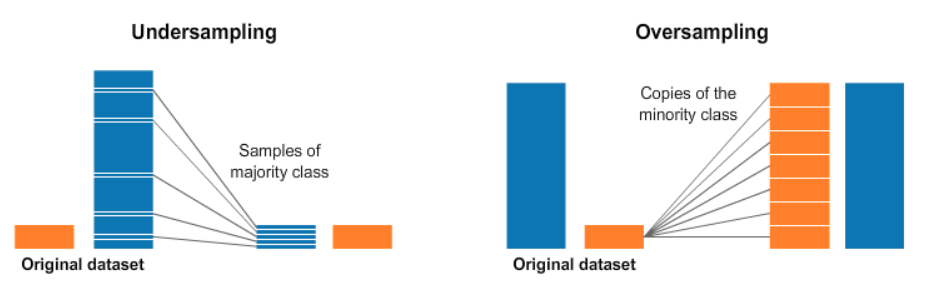

In [6]:
! pip install -U imbalanced-learn


     |████████████████████████████████| 189 kB 7.1 MB/s eta 0:00:01
     |████████████████████████████████| 23.2 MB 77.5 MB/s eta 0:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.0
    Uninstalling scikit-learn-0.23.0:
      Successfully uninstalled scikit-learn-0.23.0
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [ ]:
##!conda install -c conda-forge imbalanced-learn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2021.10.8  |       ha878542_0         139 KB  conda-forge
    certifi-2021.10.8          |   py37h89c1867_1         145 KB  conda-forge
    imbalanced-learn-0.8.1     |     pyhd8ed1ab_0         110 KB  conda-forge
    joblib-1.1.0               |     pyhd8ed1ab_0         210 KB  conda-forge
    scikit-learn-0.24.2        |   py37h18a542f_0         7.5 MB  conda-forge
    threadpoolctl-3.0.0        |     pyh8a188c0_0          17 KB  conda-forge
    ------------------------------------------------------------
                   

이 포스팅에서는 "유리 식별" 혹은 유리라고 하는 불균형 다중 클래스 분류 데이터를 중점적으로 다룰 예정이다. 이 데이터셋은 유리의 화학적 특성이 포함되어있고, 각 특성들을 이용해서 유리 샘플을 7가지 클래스 중 하나로 분류하는 것을 최종 목표로 한다.
 
데이터는 여기에서 받을 수 있다. 나는 코드에서 바로 읽어올 예정이므로 직접 다운로드하지 않는다.
데이터 셋
데이터 설명
특성은 9가지가 있으며 다음과 같다.
RI: 굴절률
Na: 나트륨
Mg: 마그네슘
Al: 알루미늄
SI: 실리콘
K: 칼륨
Ca: 칼슘
Ba: 바륨
Fe: 철
화학성분 특성은 산화물의 중량 퍼센트로 기록되어있다.
 
우리가 예측할 클래스는 7가지이다
Class 1: 빌딩 창문(float processed)
Class 2: 빌딩 창문(non-float processed)
Class 3: 자동차 창문(float processed)
Class 4: 자동차 창문 (non-float processed)
Class 5: 컨테이너
Class 6: 식기류
Class 7: 헤드램프

In [1]:
# 필요 모듈 임포트
import imblearn
print(imblearn.__version__)

import pandas as pd
from collections import Counter
from matplotlib import pyplot


# 필요 함수 정의
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()
    
    
#데이터 읽어오기
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/glass.csv'
df = pd.read_csv(url, header=None)
data = df.values
X, y = data[:, :-1], data[:, -1]

0.8.1


Class=1, n=70 (32.710%)
Class=2, n=76 (35.514%)
Class=3, n=17 (7.944%)
Class=5, n=13 (6.075%)
Class=6, n=9 (4.206%)
Class=7, n=29 (13.551%)


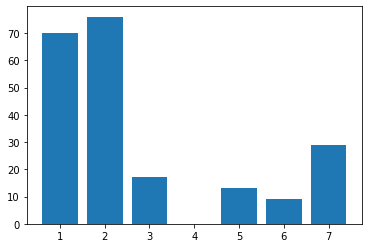

In [2]:
count_and_plot(y)  # * 4번 클래스 데이터는 존재하지 않는다

In [3]:
df.head()  # Under sampling과 단순 Over Sampling은 권장하지 않는 방법이다.

,0,1,2,3,4,5,6,7,8,9
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Under sampling

- 언더 샘플링의 단점은 잠재적으로 정보의 가치가 높은 데이터도 버려서 유용한 데이터가 사라지는 위험이 있다는 것이다.
- 데이터가 없는 4번 클래스를 제외하고 6번 클래스가 9개로 제일 적으니 모든 클래스의 데이터 개수가 9개로 맞춰질 것이다.

Class=1, n=9 (16.667%)
Class=2, n=9 (16.667%)
Class=3, n=9 (16.667%)
Class=5, n=9 (16.667%)
Class=6, n=9 (16.667%)
Class=7, n=9 (16.667%)


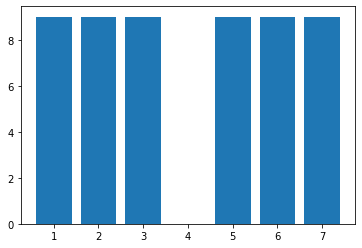

In [4]:
from imblearn.under_sampling import RandomUnderSampler
X_resampled, y_resampled = RandomUnderSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

## Over Sampling

- 모든 클래스의 데이터가 76개로 통일되었다.

 - 오버 샘플링 방식에는 여러 가지가 있지만 가장 단순한 방식은 동일한 데이터를 똑같이 복사해서 수만 늘리는 것이다. 이럴 경우 오버 피팅의 위험이 생긴다.

Class=1, n=76 (16.667%)
Class=2, n=76 (16.667%)
Class=3, n=76 (16.667%)
Class=5, n=76 (16.667%)
Class=6, n=76 (16.667%)
Class=7, n=76 (16.667%)


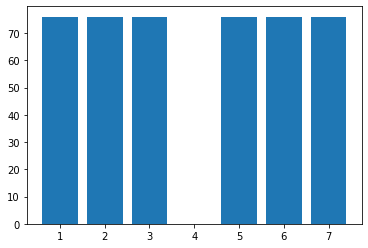

In [5]:
from imblearn.over_sampling import RandomOverSampler
X_resampled, y_resampled = RandomOverSampler(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)


## SMOTE


- SMOTE 는 낮은 비율 클래스 데이터들의 최근접 이웃을 이용하여 새로운 데이터를 생성합니다.
- 먼저 소수 클래스에서 각각의 샘플들의 knn(k-nearest neighbors)을 찾는다.
- 그리고 그 이웃들 사이에 선을 그어 무작위 점을 생성한다.

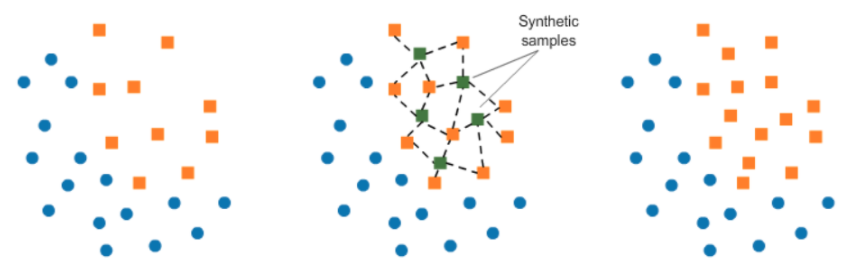

Class=1, n=76 (16.667%)
Class=2, n=76 (16.667%)
Class=3, n=76 (16.667%)
Class=5, n=76 (16.667%)
Class=6, n=76 (16.667%)
Class=7, n=76 (16.667%)


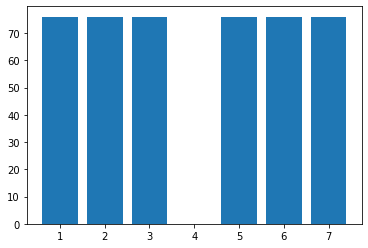

In [6]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(random_state=0).fit_resample(X, y)
count_and_plot(y_resampled)

## 베이즈 최적화 란

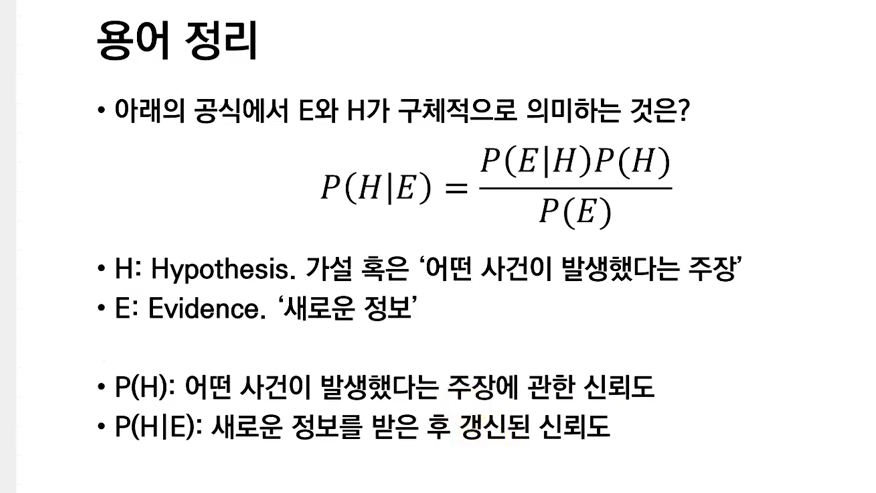

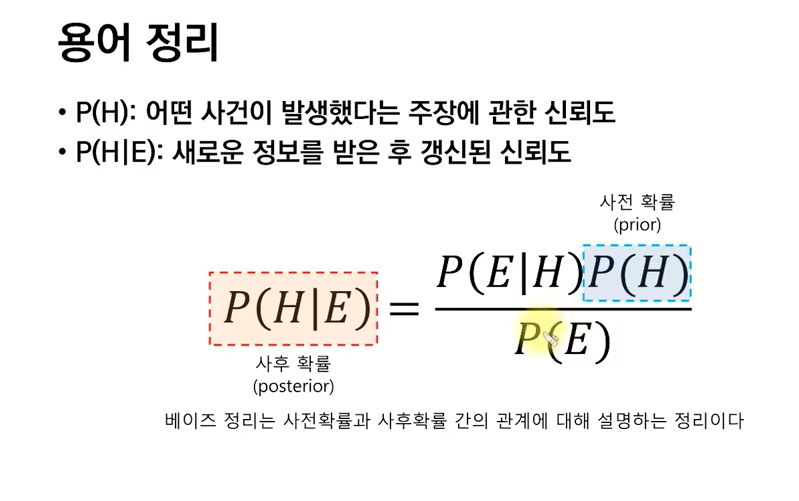

베이즈 최적화 참고

http://dmqm.korea.ac.kr/uploads/seminar/20200515_BayesianOptimization_Seminar_Final.pdf